# Van der Waals interaction and centrifugal barriers of $N=1$ molecules (space-fixed frame)

In [1]:
import numpy as np
from numpy.linalg import eigh
import matplotlib.pyplot as plt
import sys, os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import vdW_scripts as vdW

## N=1 molecule

### 1. Define parameters

In [2]:
JA = 1 # molecule A's rotational angular momentum
JB = 1 # molecule B's rotational angular momentum
Lmax = 8 # max partial wave to include

W = vdW.W_SF_coefficient_matrix(JA, JB, Lmax) # van der Waals coefficient C6 from second-order perturbation theory
C = vdW.centrifugal_coefficient_matrix(JA, JB, Lmax) # centrifugal energy 

### 2. Calculate potential curves

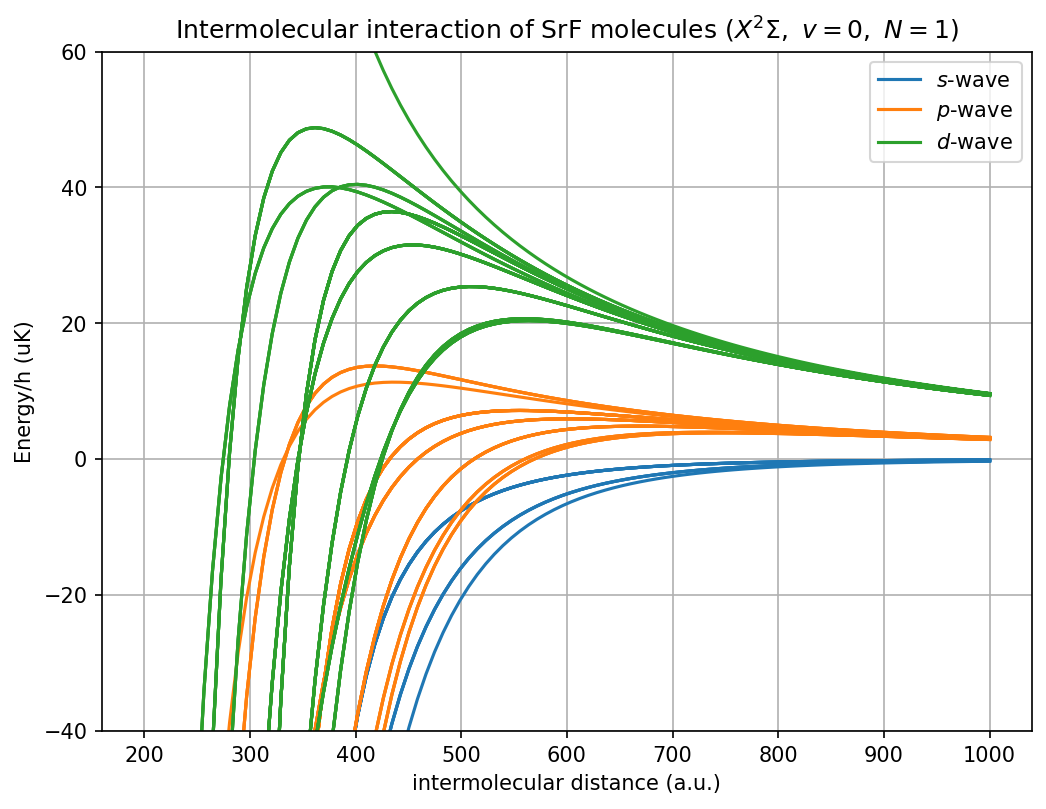

In [3]:
R_list = np.linspace(200, 1000, 100)
energies_list = np.empty((len(R_list), W.shape[0]), dtype=np.float64)
states_list = np.empty((len(R_list), W.shape[0], W.shape[0]), dtype=np.float64)
for i, R in enumerate(R_list):
    H = W*vdW.Hartree_to_uk/R**6 + C*vdW.Hartree_to_uk/R**2 # total energy
    energies, states = eigh(H)
    energies_list[i] = energies
    states_list[i] = states

energies_list, states_list = vdW.sort_eigenstates(energies_list, states_list)

fig = plt.figure(figsize=(8, 6), dpi=150)

ax1 = fig.add_subplot(1,1,1)
ax1.plot(R_list, energies_list[:, 0:9], color="C0", label="$s$-wave")
ax1.plot(R_list, energies_list[:, 9:36], color="C1", label="$p$-wave")
ax1.plot(R_list, energies_list[:, 36:81], color="C2", label="$d$-wave")

handles, labels = ax1.get_legend_handles_labels()
display = (0,9,36)

# plt.plot(R_list, energies_list[:, 0:9]) # plot s-, p-, d-wave potential curves

ax1.set_ylabel("Energy/$k_B$ (uK)")
ax1.set_xlabel("intermolecular distance (a.u.)")
ax1.set_title("Intermolecular interaction of SrF molecules ($X^2\Sigma,\ v=0,\ N=1$)")
ax1.legend([handle for i,handle in enumerate(handles) if i in display],
            [label for i,label in enumerate(labels) if i in display], loc='upper right')

ax1.set_ylim(-40, 60)
ax1.grid()
plt.show()

### 3. Extract centrifugal barriers

In [4]:
s_wave_energies = energies_list[:, 0:9].T
p_wave_energies = energies_list[:, 9:36].T
d_wave_energies = energies_list[:, 36:81].T

s_wave_barrier_list = np.array([])
p_wave_barrier_list = np.array([])
d_wave_barrier_list = np.array([])

for s_wave_energ in s_wave_energies:
    s_wave_barrier = np.amax(s_wave_energ)
    if s_wave_barrier == s_wave_energ[0]:
        print("No barrier in s-wave potential curve (pure repulsive).")
    elif s_wave_barrier == s_wave_energ[-1]:
        s_wave_barrier_list = np.append(s_wave_barrier_list, 0)
        print("s-wave barrier height = 0 uK (pure attractive).")
    else:
        s_wave_barrier_list = np.append(s_wave_barrier_list, s_wave_barrier)
        print("s-wave barrier height = {:.2f} uK.".format(s_wave_barrier))

for p_wave_energ in p_wave_energies:
    p_wave_barrier = np.amax(p_wave_energ)
    if p_wave_barrier == p_wave_energ[0]:
        print("No barrier in p-wave potential curve (pure repulsive).")
    elif p_wave_barrier == p_wave_energ[-1]:
        p_wave_barrier_list = np.append(p_wave_barrier_list, 0)
        print("p-wave barrier height = 0 uK (pure attractive).")
    else:
        p_wave_barrier_list = np.append(p_wave_barrier_list, p_wave_barrier)
        print("p-wave barrier height = {:.2f} uK.".format(p_wave_barrier))

for d_wave_energ in d_wave_energies:
    d_wave_barrier = np.amax(d_wave_energ)
    if d_wave_barrier == d_wave_energ[0]:
        print("No barrier in d-wave potential curve (pure repulsive).")
    elif d_wave_barrier == d_wave_energ[-1]:
        d_wave_barrier_list = np.append(d_wave_barrier_list, 0)
        print("d-wave barrier height = 0 uK (pure attractive).")
    else:
        d_wave_barrier_list = np.append(d_wave_barrier_list, d_wave_barrier)
        print("d-wave barrier height = {:.2f} uK.".format(d_wave_barrier))             


s-wave barrier height = 0 uK (pure attractive).
s-wave barrier height = 0 uK (pure attractive).
s-wave barrier height = 0 uK (pure attractive).
s-wave barrier height = 0 uK (pure attractive).
s-wave barrier height = 0 uK (pure attractive).
s-wave barrier height = 0 uK (pure attractive).
s-wave barrier height = 0 uK (pure attractive).
s-wave barrier height = 0 uK (pure attractive).
s-wave barrier height = 0 uK (pure attractive).
p-wave barrier height = 3.88 uK.
p-wave barrier height = 3.88 uK.
p-wave barrier height = 3.88 uK.
p-wave barrier height = 3.98 uK.
p-wave barrier height = 3.98 uK.
p-wave barrier height = 3.98 uK.
p-wave barrier height = 4.88 uK.
p-wave barrier height = 4.88 uK.
p-wave barrier height = 4.88 uK.
p-wave barrier height = 4.88 uK.
p-wave barrier height = 4.88 uK.
p-wave barrier height = 5.95 uK.
p-wave barrier height = 5.95 uK.
p-wave barrier height = 5.95 uK.
p-wave barrier height = 5.95 uK.
p-wave barrier height = 5.95 uK.
p-wave barrier height = 7.19 uK.
p-wave 

### 4. Calculate unitarity collision rate

In [5]:
T = 40 # uK, molecule temperature

partial_rate = 0
barriers = np.append(s_wave_barrier_list, p_wave_barrier_list)
barriers = np.append(barriers, d_wave_barrier_list)

for barrier in barriers:
    # p_wave and d_wave loss rate
    partial_rate += vdW.unitarity_rate(T, barrier)

partial_rate /= (2*JA+1)*(2*JB+1) # average over all Zeeman sublevels
print("Unitarity loss rate (up to d-wave) = " + np.format_float_scientific(partial_rate, 2) + " cm^3/s.")

Unitarity loss rate (up to d-wave) = 1.04e-09 cm^3/s.
